<a href="https://colab.research.google.com/github/mxie18/research/blob/main/Research_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd
import altair as alt 
import pingouin as pg
import scipy.stats
import seaborn as sns
import math
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("fp4final.csv")
data.head()

,participant,landscape,abstract,portrait,fullbody
0,1,3,3,4,3
1,2,4,3,4,3
2,3,1,3,3,2
3,4,4,2,4,4
4,5,4,3,3,1


 $H_O$: $\mu_{landscape}$ = $\mu_{abstract}$ = $\mu_{portrait}$ = $\mu_{fullbody}$ <br>
 $H_A$: at least one of our means differ <br>

 Stated above are our hypotheses for the experiment.

In [ ]:
print('landscape average score: ' + str(data['landscape'].mean()))
print('landscape standard error: ' + str(data['landscape'].sem()))
print('landscape median: ' + str(data['landscape'].median()))
print('abstract average score: ' + str(data['abstract'].mean()))
print('abstract standard error: ' + str(data['abstract'].sem()))
print('abstract median: ' + str(data['abstract'].median()))
print('portrait average score: ' + str(data['portrait'].mean()))
print('portrait standrad error: ' + str(data['portrait'].sem()))
print('portrait median: ' + str(data['portrait'].median()))
print('full body average score: ' + str(data['fullbody'].mean()))
print('full body standard error: ' + str(data['fullbody'].sem()))
print('full body median: ' + str(data['fullbody'].median()))

landscape average score: 3.289473684210526
landscape standard error: 0.15960430594537406
landscape median: 3.0
abstract average score: 2.6842105263157894
abstract standard error: 0.16048141992797105
abstract median: 3.0
portrait average score: 3.263157894736842
portrait standrad error: 0.1586043796843966
portrait median: 3.0
full body average score: 2.9210526315789473
full body standard error: 0.20092807056522644
full body median: 3.0


Above are some initial summary statistics for our data.

In [ ]:
rm_melt = pd.melt(data, id_vars=["participant"], value_vars=["landscape","abstract","portrait","fullbody"])
rm_melt.columns = ["participant","image type","score"]
print(rm_melt)

     participant image type  score
0              1  landscape      3
1              2  landscape      4
2              3  landscape      1
3              4  landscape      4
4              5  landscape      4
..           ...        ...    ...
147           34   fullbody      4
148           35   fullbody      4
149           36   fullbody      5
150           37   fullbody      0
151           38   fullbody      4

[152 rows x 3 columns]


We initially reformat the data to make it easier to plug into our functions.

In [ ]:
pg.sphericity(data=rm_melt,dv="score",subject="participant",within="image type")

SpherResults(spher=True, W=0.8626423650911859, chi2=5.278139899472336, dof=5, pval=0.38304426150697474)

In [ ]:
pg.normality(data=rm_melt,dv="score",group="image type")

,W,pval,normal
image type,,,
landscape,0.853359,0.000157,False
abstract,0.876965,0.000607,False
portrait,0.908470,0.004460,False
fullbody,0.930643,0.021019,False


Assumptions checks are needed to conduct a repeated measures ANOVA. We first ran the mauchly sphericity test which passed. Then, we checked our normality assumptions using the shapiro wilk test. This failed for all of our image types. As a result, we conduct a Friedman test (the non parametric equivalent of a repeated measures).

In [ ]:
pg.friedman(data=rm_melt, dv="score", within="image type", subject="participant")

,Source,W,ddof1,Q,p-unc
Friedman,image type,0.070938,3,8.086957,0.044248


A Friedman test was conducted with Q = 8.087 and p-value 0.044. Since the p-value is less than our alpha significance of 0.05, we reject the null hypothesis and conclude that at least one of our means is significantly different.

In [ ]:
pg.pairwise_tests(dv="score", within="image type", subject="participant", padjust="bonf", data=rm_melt)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,image type,abstract,fullbody,True,True,-0.875610,37.0,two-sided,0.386891,1.000000,bonf,0.25,-0.209149
1,image type,abstract,landscape,True,True,-3.058046,37.0,two-sided,0.004125,0.024753,bonf,8.906,-0.607261
2,image type,abstract,portrait,True,True,-2.536232,37.0,two-sided,0.015558,0.093346,bonf,2.855,-0.582671
3,image type,fullbody,landscape,True,True,-1.575932,37.0,two-sided,0.123554,0.741326,bonf,0.541,-0.326036
4,image type,fullbody,portrait,True,True,-1.506003,37.0,two-sided,0.140557,0.843341,bonf,0.492,-0.303481
5,image type,landscape,portrait,True,True,0.124345,37.0,two-sided,0.901715,1.000000,bonf,0.176,0.026558


Pairwise t tests were then conducted to investigate which specific means were significantly different from each other. Looking at our p-values, the difference between our abstract and landscape scores (p-value = 0.004) and abstract and portrait scores (p-value = 0.02) are significant. Thus, we conclude that users were significantly better at identifiying images classified as landscape or portrait over abstract ones.

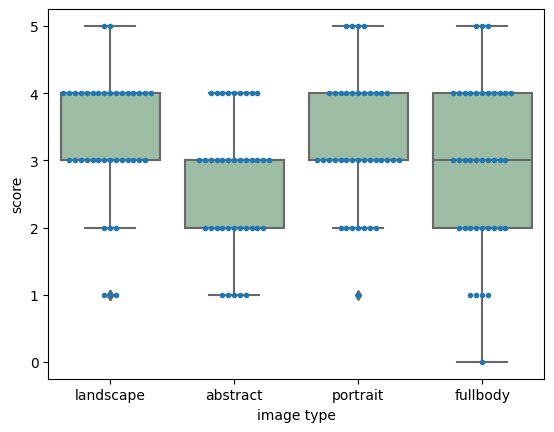

In [ ]:
ax = sns.boxplot(x="image type", y="score",data=rm_melt, color="#99c2a2")
ax = sns.swarmplot(x="image type", y="score",data=rm_melt, s = 4)
plt.show()

Our data distribution can be easily visualized by the box and swarm plot shown above.